<a href="https://colab.research.google.com/github/Tahia20/github-tutorial/blob/main/6g_trained_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Define dataset parameters
num_base_stations = 10
num_days = 7
num_hours = num_days * 24  # Total hours of data
time_range = pd.date_range(start='2025-01-01', periods=num_hours, freq='H')

# Generate dataset
data = []
for bs_id in range(1, num_base_stations + 1):
    for timestamp in time_range:
        load = np.random.uniform(10, 100)  # Load (10% to 100%)
        esmode = np.random.choice([0, 1])  # Energy-saving mode (0 or 1)
        tx_power = np.random.uniform(10, 50)  # Transmission power (10 to 50W)

        # Energy Consumption formula (6G is 30% more efficient than 5G)
        energy_consumption = (40 + 80 * (load / 100) + 8 * esmode + 0.4 * tx_power +
                             np.random.normal(0, 5))  # Adding some noise

        data.append([timestamp, f'BS_{bs_id}', energy_consumption, load, esmode, tx_power])

# Create DataFrame
columns = ['Time', 'BS', 'Energy (W)', 'Load (%)', 'ESMODE', 'TXpower (W)']
df = pd.DataFrame(data, columns=columns)

# Save dataset
df.to_csv('6G_Energy_Consumption.csv', index=False)

# Display first few rows
df.head()


<ipython-input-13-3a31fa51fa76>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(start='2025-01-01', periods=num_hours, freq='H')


,Time,BS,Energy (W),Load (%),ESMODE,TXpower (W)
0,2025-01-01 00:00:00,BS_1,118.233862,87.714539,0,28.969506
1,2025-01-01 01:00:00,BS_1,134.565093,94.260017,1,48.549843
2,2025-01-01 02:00:00,BS_1,125.377831,85.728045,1,10.863377
3,2025-01-01 03:00:00,BS_1,121.367357,86.686809,1,23.528449
4,2025-01-01 04:00:00,BS_1,97.619478,49.030261,0,42.571388


In [14]:
print(df.isnull().sum())


Time           0
BS             0
Energy (W)     0
Load (%)       0
ESMODE         0
TXpower (W)    0
dtype: int64


In [15]:
df.describe()


,Time,Energy (W),Load (%),ESMODE,TXpower (W)
count,1680,1680.000000,1680.000000,1680.000000,1680.000000
mean,2025-01-04 11:30:00.000000256,100.576395,55.449357,0.497619,30.328101
min,2025-01-01 00:00:00,49.236293,10.168924,0.000000,10.018344
25%,2025-01-02 17:45:00,82.413360,32.891097,0.000000,20.192406
50%,2025-01-04 11:30:00,100.550941,55.619796,0.000000,29.957408
75%,2025-01-06 05:15:00,119.194066,77.949031,1.000000,40.510285
max,2025-01-07 23:00:00,151.050733,99.892706,1.000000,49.989156
std,NaN,22.479907,26.010195,0.500143,11.640799


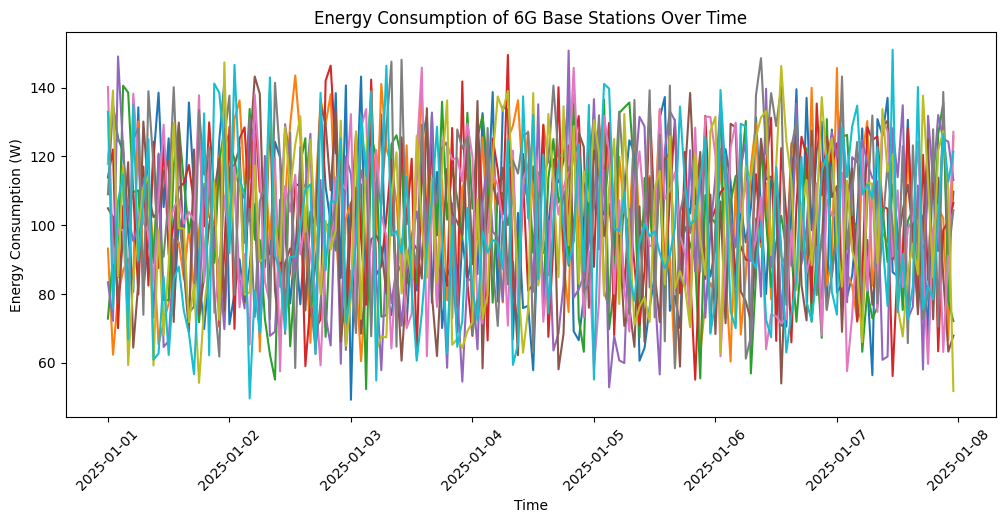

In [16]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Time', y='Energy (W)', hue='BS', legend=False)
plt.xlabel("Time")
plt.ylabel("Energy Consumption (W)")
plt.title("Energy Consumption of 6G Base Stations Over Time")
plt.xticks(rotation=45)
plt.show()


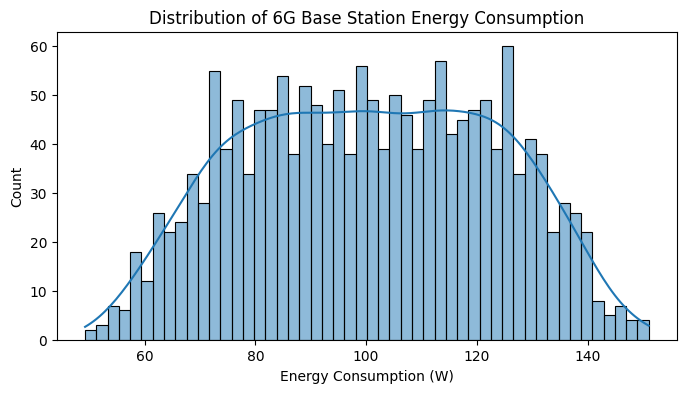

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Energy (W)"], bins=50, kde=True)
plt.xlabel("Energy Consumption (W)")
plt.title("Distribution of 6G Base Station Energy Consumption")
plt.show()


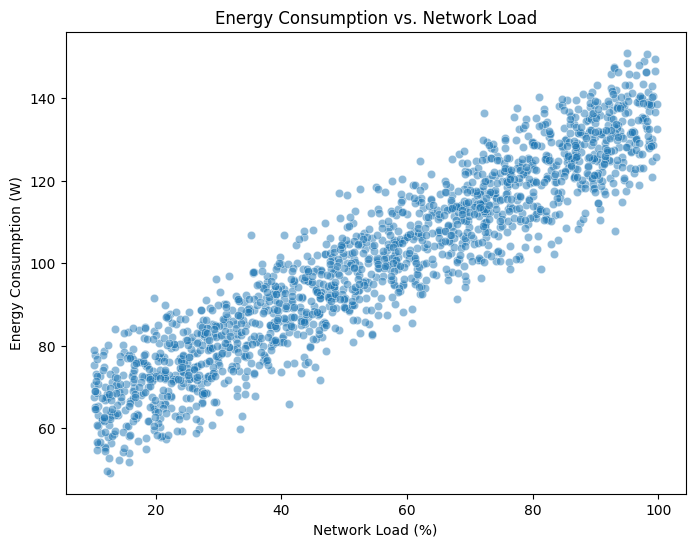

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Load (%)', y='Energy (W)', alpha=0.5)
plt.xlabel("Network Load (%)")
plt.ylabel("Energy Consumption (W)")
plt.title("Energy Consumption vs. Network Load")
plt.show()


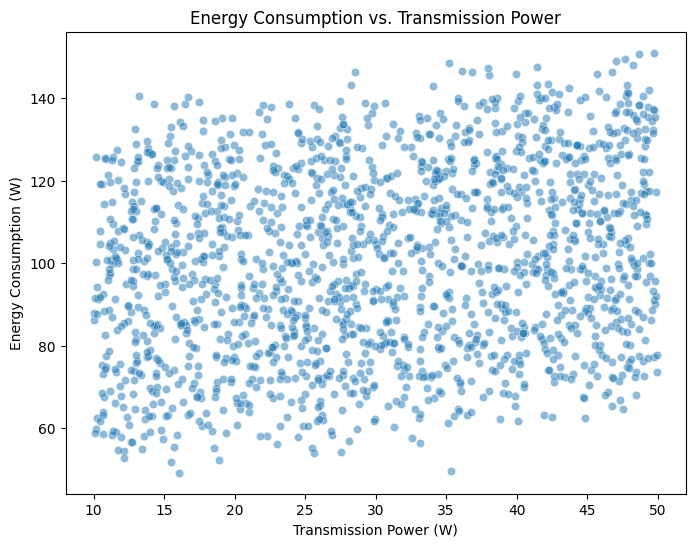

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TXpower (W)', y='Energy (W)', alpha=0.5)
plt.xlabel("Transmission Power (W)")
plt.ylabel("Energy Consumption (W)")
plt.title("Energy Consumption vs. Transmission Power")
plt.show()


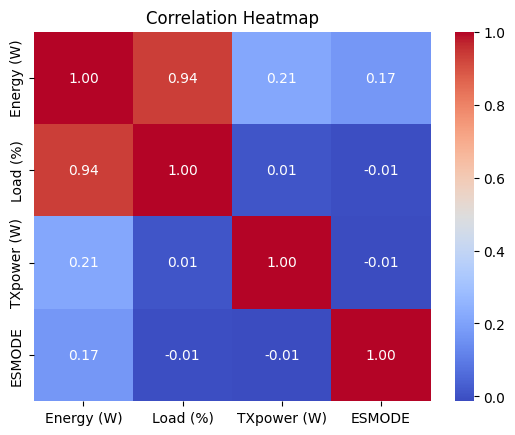

In [20]:
corr_matrix = df[['Energy (W)', 'Load (%)', 'TXpower (W)', 'ESMODE']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


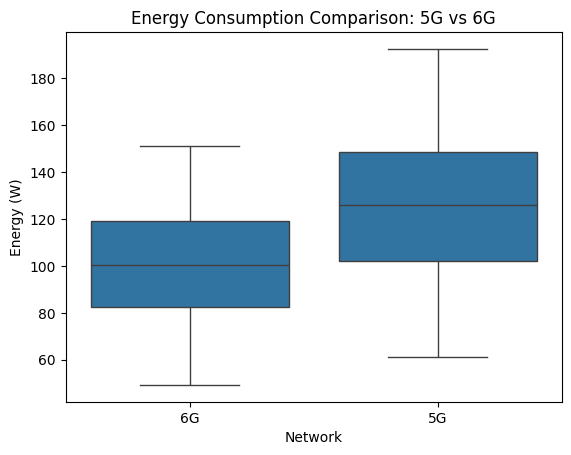

In [21]:
data_5g = []

for bs_id in range(1, num_base_stations + 1):
    for timestamp in time_range:
        load = np.random.uniform(10, 100)
        esmode = np.random.choice([0, 1])
        tx_power = np.random.uniform(10, 50)

        # 5G consumes more power
        energy_consumption_5g = (50 + 100 * (load / 100) + 10 * esmode + 0.5 * tx_power +
                                np.random.normal(0, 5))

        data_5g.append([timestamp, f'BS_{bs_id}', energy_consumption_5g, load, esmode, tx_power])

df_5g = pd.DataFrame(data_5g, columns=columns)
df_5g["Network"] = "5G"
df["Network"] = "6G"

df_combined = pd.concat([df, df_5g])

sns.boxplot(x="Network", y="Energy (W)", data=df_combined)
plt.title("Energy Consumption Comparison: 5G vs 6G")
plt.show()
